In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
data=pd.read_csv('Eurovision_1990_2018.csv', sep=';')

In [3]:
data.head()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points
0,1990,f,1990f,J,Austria,Belgium,4
1,1990,f,1990f,J,Austria,Cyprus,0
2,1990,f,1990f,J,Austria,Denmark,6
3,1990,f,1990f,J,Austria,Finland,0
4,1990,f,1990f,J,Austria,France,2


In [4]:
data.describe()

,Year,Points
count,25801.000000,25801.000000
mean,2007.671292,2.398589
std,8.320227,3.574115
min,1990.000000,0.000000
25%,2002.000000,0.000000
50%,2009.000000,0.000000
75%,2015.000000,4.000000
max,2018.000000,12.000000


Посмотрим, сколько лет каждая из стран голосовала:

In [5]:
data1=data[['From country','Year']].drop_duplicates()
data2=data1.groupby('From country').count().sort_values('Year', ascending=False)
data2

,Year
From country,
Sweden,29
United Kingdom,29
Spain,29
France,29
Malta,28
Germany,28
Norway,28
Ireland,28
Cyprus,27


Видно, что некоторые страны уже перестали существовать. Почистим немного данные, уберем из двнных страны, кто за период с 1990 г по 2018 г голосовал менеее 4 раз

In [6]:
old_or_rare_countries=data2.loc[data2['Year']<4]


In [7]:
li=list(old_or_rare_countries.index.values)
print(li)

['Monaco', 'Serbia & Montenegro', 'Yugoslavia', 'The Netherands']


In [8]:
def delete_old_or_rare_countries(df, li=li):
    for item in li:
        print(item)
        df=df.loc[df['From country'] != item]
        df=df.loc[df['To country'] != item]
    return(df)
    
        



In [9]:
cleaned_data=delete_old_or_rare_countries(data)
cleaned_data.shape

Monaco
Serbia & Montenegro
Yugoslavia
The Netherands


(25408, 7)

Добавим столбец с комбинацией стран:

In [10]:
cleaned_data['from_to']=cleaned_data['From country']+cleaned_data['To country']

In [11]:
cleaned_data.head()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,from_to
0,1990,f,1990f,J,Austria,Belgium,4,AustriaBelgium
1,1990,f,1990f,J,Austria,Cyprus,0,AustriaCyprus
2,1990,f,1990f,J,Austria,Denmark,6,AustriaDenmark
3,1990,f,1990f,J,Austria,Finland,0,AustriaFinland
4,1990,f,1990f,J,Austria,France,2,AustriaFrance


Выделим баллы от жюри (для справки: голосование зрителей ввели только в 2016 г)

In [12]:
Jury_data=cleaned_data.loc[cleaned_data['Jury or Televoting']=='J']
Jury_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22209 entries, 0 to 24707
Data columns (total 8 columns):
Year                  22209 non-null int64
(semi-) final         22209 non-null object
Edition               22209 non-null object
Jury or Televoting    22209 non-null object
From country          22209 non-null object
To country            22209 non-null object
Points                22209 non-null int64
from_to               22209 non-null object
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


Посмотрим, кому некоторые страны отдавали наивысшие средние балы:

In [13]:
def Country_From(country, df):
    country_data=df.loc[(df['From country']==country)]
    country_mean_scores=country_data[['To country','Points']].groupby('To country').mean()
    return(country_mean_scores.sort_values('Points',ascending=False).head(10))


In [14]:
Country_From('Russia', Jury_data)

,Points
To country,
Azerbaijan,9.111111
Armenia,8.777778
Belarus,6.500000
Georgia,6.428571
Ukraine,5.928571
Moldova,5.777778
Australia,3.666667
Belgium,3.666667
Greece,3.277778


In [15]:
Country_From('Greece', Jury_data)

,Points
To country,
Cyprus,10.947368
Albania,8.750000
Armenia,6.100000
Italy,4.615385
Georgia,4.571429
Azerbaijan,4.500000
Russia,4.263158
Moldova,3.700000
Malta,3.578947


In [16]:
Country_From('Azerbaijan', Jury_data)

,Points
To country,
Turkey,12.000000
Ukraine,9.000000
Russia,7.444444
Georgia,7.000000
Belarus,6.500000
Moldova,5.428571
Malta,5.400000
Bulgaria,5.000000
Romania,4.111111


In [17]:
Country_From('Belarus', Jury_data)

,Points
To country,
Russia,10.846154
Ukraine,7.357143
Australia,5.250000
Azerbaijan,5.200000
Georgia,4.857143
Armenia,4.500000
Lithuania,4.000000
Norway,3.583333
Moldova,3.500000


Видимо, очень "независимое" жюри :)

Выделим баллы от телеголосования (для справки: голосование зрителей ввели только в 2016 г)

In [18]:
Tele_data=cleaned_data.loc[cleaned_data['Jury or Televoting']=='T']
Tele_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3199 entries, 20417 to 25800
Data columns (total 8 columns):
Year                  3199 non-null int64
(semi-) final         3199 non-null object
Edition               3199 non-null object
Jury or Televoting    3199 non-null object
From country          3199 non-null object
To country            3199 non-null object
Points                3199 non-null int64
from_to               3199 non-null object
dtypes: int64(2), object(6)
memory usage: 224.9+ KB


In [19]:
Country_From('Russia', Tele_data)

,Points
To country,
Moldova,12.0
Armenia,12.0
Ukraine,9.0
Denmark,7.0
Azerbaijan,6.0
Cyprus,5.5
Norway,5.0
Poland,5.0
Israel,5.0


In [20]:
Country_From('Greece', Tele_data)

,Points
To country,
Cyprus,12.000000
Albania,10.000000
Russia,10.000000
Bulgaria,7.333333
Armenia,5.000000
Italy,5.000000
Portugal,4.000000
Estonia,4.000000
Moldova,3.500000


Поверим, является ли комбиация стран значимой при голосовонаии Жюри, и в телеголосовании методом однофакторного дисперсионного анализа

Выдвинем гипотизу H0 - средние по годам по всем комбинациям стран равны

### 1. Голосование Жюри

Выборочные средние количество значений по каждой группе:

In [21]:
Jury_groups=Jury_data[['from_to','Points']].groupby('from_to').agg(['mean','count']).sort_values(('Points','count'),ascending=False)
Jury_groups.head(10)

Points      
                          mean count
from_to                             
FranceSpain           3.586207    29
United KingdomSpain   1.103448    29
United KingdomFrance  1.344828    29
SpainFrance           2.137931    29
SwedenFrance          2.068966    29
SwedenSpain           0.862069    29
SpainUnited Kingdom   1.793103    29
SwedenUnited Kingdom  1.724138    29
FranceUnited Kingdom  2.551724    29
SwedenGermany         1.500000    28

Видно, что средние баллы разнятся. Проверим статистическую значимость этого отличия

In [22]:
Jury_groups.columns=['groups_mean_points', 'groups_count_points']

In [23]:
Jury_data2=Jury_data.merge(Jury_groups, how='left', on='from_to')
Jury_data2.head()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,from_to,groups_mean_points,groups_count_points
0,1990,f,1990f,J,Austria,Belgium,4,AustriaBelgium,1.800000,15
1,1990,f,1990f,J,Austria,Cyprus,0,AustriaCyprus,0.421053,19
2,1990,f,1990f,J,Austria,Denmark,6,AustriaDenmark,2.250000,16
3,1990,f,1990f,J,Austria,Finland,0,AustriaFinland,0.307692,13
4,1990,f,1990f,J,Austria,France,2,AustriaFrance,2.043478,23


Общее среднее:

In [24]:
y_mean=Jury_data['Points'].mean()
y_mean

2.405376198838309

Найдём значения  𝑆2𝐹  и  𝑆2𝑟𝑒𝑠 :

$$S_F^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i$$

$$S_{res}^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2.$$

In [25]:
def S2F(df_groups, y_mean=y_mean):
    return np.sum((df_groups['groups_mean_points'].values-y_mean)**2*df_groups['groups_count_points'].values)

def S2res(df):
    return np.sum((df['Points'].values-df['groups_mean_points'].values)**2)

def S2(df, y_mean=y_mean):
    return np.sum((df['Points'].values-y_mean)**2)


In [26]:
S2F(Jury_groups)

78293.2002370624

In [27]:
S2res(Jury_data2)

205416.1978447963

In [28]:
S2(Jury_data2)

283709.39808185876

In [29]:
S2F(Jury_groups)+S2res(Jury_data2)

283709.3980818587

Запишем оценки дисперсий:

In [30]:
k=Jury_groups.shape[0]
k

2116

In [31]:
DF=S2F(Jury_groups)/(k-1)
DF

37.01806157780728

In [32]:
n=Jury_data2.shape[0]
n

22209

In [33]:
Dres=S2res(Jury_data2)/(n-k)
Dres

10.223271678932777

Для проверки гипотезы $H_0$ запишем статистику
$$T = \dfrac{\sigma_F^2}{\sigma_{res}^2}.$$


In [34]:
T=DF/Dres
T

3.620960367715832

Зафиксируем уровень значимости  𝛼=0.05 . Для него найдём критическое значение  𝐹𝑐𝑟𝑖𝑡 :

In [35]:
alpha=0.05
F_crit = stats.f.ppf(1 - alpha, k-1, n-k)
F_crit

1.0539266294211407

In [36]:
T>=F_crit

True

Видим, что $T > F_{crit}$, поэтому заключаем, что отличие средних балов действительно является статистически значимым.

### 2. Голосование телезрителей

In [37]:
Tele_groups=Tele_data[['from_to','Points']].groupby('from_to').agg(['mean','count']).sort_values(('Points','count'),ascending=False)
Tele_groups.head(10)

Points      
                      mean count
from_to                         
IcelandUkraine    0.000000     3
HungaryAustralia  1.000000     3
HungaryBulgaria   5.333333     3
HungaryCyprus     4.666667     3
HungaryFrance     0.666667     3
HungaryGermany    0.333333     3
HungaryIsrael     3.333333     3
HungaryItaly      3.333333     3
HungarySpain      0.000000     3
HungarySweden     3.333333     3

Видно, что средние баллы разнятся. Проверим статистическую значимость этого отличия

In [38]:
Tele_groups.columns=['groups_mean_points', 'groups_count_points']

In [39]:
Tele_data2=Tele_data.merge(Tele_groups, how='left', on='from_to')
Tele_data2.head()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,from_to,groups_mean_points,groups_count_points
0,2016,f,2016f,T,Albania,Armenia,2,AlbaniaArmenia,1.000000,2
1,2016,f,2016f,T,Albania,Australia,12,AlbaniaAustralia,4.000000,3
2,2016,f,2016f,T,Albania,Austria,0,AlbaniaAustria,0.666667,3
3,2016,f,2016f,T,Albania,Azerbaijan,0,AlbaniaAzerbaijan,0.000000,2
4,2016,f,2016f,T,Albania,Belgium,0,AlbaniaBelgium,2.500000,2


Общее среднее:

In [40]:
y_mean=Tele_data['Points'].mean()
y_mean

2.2844638949671774

Найдём значения  𝑆2𝐹  и  𝑆2𝑟𝑒𝑠 :

$$S_F^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i$$

$$S_{res}^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2.$$

In [41]:
S2F(Tele_groups)

24010.406548522406

In [42]:
S2res(Tele_data2)

15789.5

In [43]:
S2(Tele_data2)

39799.9065485224

In [44]:
S2F(Tele_groups)+S2res(Tele_data2)

39799.906548522406

Запишем оценки дисперсий:

In [45]:
k=Tele_groups.shape[0]
k

1606

In [46]:
DF=S2F(Tele_groups)/(k-1)
DF

14.959754858892465

In [47]:
n=Tele_data2.shape[0]
n

3199

In [48]:
Dres=S2res(Tele_data2)/(n-k)
Dres

9.911801632140616

Для проверки гипотезы $H_0$ запишем статистику
$$T = \dfrac{\sigma_F^2}{\sigma_{res}^2}.$$


In [49]:
T=DF/Dres
T

1.5092871522350737

Зафиксируем уровень значимости  𝛼=0.05 . Для него найдём критическое значение  𝐹𝑐𝑟𝑖𝑡 :

In [50]:
alpha=0.05
F_crit = stats.f.ppf(1 - alpha, k-1, n-k)
F_crit

1.0857823720840487

In [51]:
T>=F_crit

True

Видим, что $T > F_{crit}$, хоть и ненамного, поэтому заключаем, что отличие средних балов действительно является статистически значимым.

### 3. Прогноз на 2019

Попробуем подставить средние баллы по комбинациям стран в датасет 2019-го года и сравним результат с реальным голосованием

In [52]:
pred_data=pd.read_csv('Eurovision_2019.csv', sep=';')

In [53]:
pred_data.shape

(2082, 7)

In [54]:
pred_data.describe()

,Year,Points
count,2082.0,2082.000000
mean,2019.0,2.241114
std,0.0,3.541405
min,2019.0,0.000000
25%,2019.0,0.000000
50%,2019.0,0.000000
75%,2019.0,4.000000
max,2019.0,12.000000


In [55]:
pred_data.loc[pred_data['From country'] == 'North Macedonia', 'From country'] = 'F.Y.R. Macedonia'
pred_data.loc[pred_data['To country'] == 'North Macedonia', 'To country'] = 'F.Y.R. Macedonia'

Добавим столбец с комбинацией стран

In [56]:
pred_data['from_to']=pred_data['From country']+pred_data['To country']

#### 3.1 Выберем данные по Жюри

In [57]:
Jury_pred_data=pred_data.loc[pred_data['Jury or Televoting']=='J']

Подставим средние голоса за предыдущие годы

In [58]:
Jury_pred_data2=Jury_pred_data.merge(Jury_groups, how='left', on='from_to')
Jury_pred_data2.head(20)

,Year,final,Edition,Jury or Televoting,From country,To country,Points,from_to,groups_mean_points,groups_count_points
0,2019,f,2019f,J,Malta,Italy,12,MaltaItaly,8.000000,12.0
1,2019,f,2019f,J,Malta,Spain,0,MaltaSpain,1.714286,28.0
2,2019,f,2019f,J,Malta,Israel,0,MaltaIsrael,3.421053,19.0
3,2019,f,2019f,J,Malta,United Kingdom,0,MaltaUnited Kingdom,4.285714,28.0
4,2019,f,2019f,J,Malta,Australia,0,MaltaAustralia,3.000000,4.0
5,2019,f,2019f,J,Malta,Russia,10,MaltaRussia,3.050000,20.0
6,2019,f,2019f,J,Malta,Switzerland,0,MaltaSwitzerland,2.230769,13.0
7,2019,f,2019f,J,Malta,Norway,0,MaltaNorway,2.083333,24.0
8,2019,f,2019f,J,Malta,Sweden,5,MaltaSweden,3.888889,27.0
9,2019,f,2019f,J,Malta,Azerbaijan,8,MaltaAzerbaijan,5.700000,10.0


Уберем строки, которые не удалось сопоставить

In [59]:
Jury_pred_data2=Jury_pred_data2.dropna()

In [60]:
y=Jury_pred_data2['Points'].values
z=Jury_pred_data2['groups_mean_points'].values

In [61]:
np.corrcoef(z, y)

array([[1.        , 0.27666144],
       [0.27666144, 1.        ]])

коэффициент корреляции достаточно низкий

Посчитаем коэффициент детерминации r2

In [62]:
z.var(), y.var()

(4.099544326836599, 12.583332394387355)

In [63]:
R2 = z.var()/y.var() 
R2

0.32579162644270226

Видим, что по r2 качество нашей модели "средних значений" оказалось низкое

Посмотрим, как на самом деле в 2019 г. проголосовали жюри из Росиии:

In [64]:
country_data=Jury_pred_data2.loc[(Jury_pred_data2['From country']=='Russia')]
country_scores=country_data[['To country','Points','groups_mean_points']].groupby('To country').mean()
country_scores.sort_values('Points',ascending=False).head(10)

,Points,groups_mean_points
To country,,
Azerbaijan,12,9.111111
Greece,10,3.277778
Cyprus,8,2.461538
Belarus,7,6.500000
Malta,6,2.666667
San Marino,5,0.000000
F.Y.R. Macedonia,4,1.000000
Albania,3,0.000000
Iceland,2,0.714286


Выберем голосующие страны, по которым локальные квадраты среднеквадратичных отклонений прогноза от плана наименьшие

In [65]:
Jury_pred_data2['std2']=(Jury_pred_data2['Points']-Jury_pred_data2['groups_mean_points'])**2
Jury_pred_local_diff=Jury_pred_data2[['From country','Points', 'std2']].groupby('From country').mean()

Jury_pred_local_diff.sort_values('std2').head(10)

,Points,std2
From country,,
Cyprus,2.375000,5.952397
Montenegro,2.192308,7.031969
Greece,2.280000,7.170428
Malta,2.280000,7.805661
Russia,2.280000,9.091891
Azerbaijan,2.280000,9.766710
Czech Republic,2.478261,10.167736
San Marino,2.280000,10.455058
Australia,2.000000,10.559524


Посмотрим на топ 3 более подробно:

In [66]:
country_data=Jury_pred_data2.loc[(Jury_pred_data2['From country']=='Cyprus')]
country_scores=country_data[['To country','Points','groups_mean_points']].groupby('To country').mean()
country_scores.sort_values('Points',ascending=False).head(10)

,Points,groups_mean_points
To country,,
Greece,12,11.391304
Russia,10,5.000000
Italy,8,5.833333
Sweden,7,2.730769
Azerbaijan,6,5.000000
The Netherlands,5,1.266667
France,4,2.222222
Malta,3,2.947368
Albania,2,1.250000


In [67]:
country_data=Jury_pred_data2.loc[(Jury_pred_data2['From country']=='Montenegro')]
country_scores=country_data[['To country','Points','groups_mean_points']].groupby('To country').mean()
country_scores.sort_values('Points',ascending=False).head(10)

,Points,groups_mean_points
To country,,
Serbia,12,11.000000
Russia,10,5.000000
Albania,8,8.800000
F.Y.R. Macedonia,7,9.000000
Malta,6,2.400000
Cyprus,5,0.200000
Australia,4,1.000000
Denmark,3,2.285714
Italy,2,4.571429


In [68]:
country_data=Jury_pred_data2.loc[(Jury_pred_data2['From country']=='Greece')]
country_scores=country_data[['To country','Points','groups_mean_points']].groupby('To country').mean()
country_scores.sort_values('Points',ascending=False).head(10)

,Points,groups_mean_points
To country,,
Cyprus,12,10.947368
Russia,10,4.263158
Azerbaijan,8,4.500000
Italy,7,4.615385
San Marino,6,0.000000
Malta,5,3.578947
Slovenia,4,1.153846
Albania,3,8.750000
Australia,2,3.000000


действительно, несмотря на плохое качество мождели в целом, судейство отдельных стран сложно назвать независимым. Причем это голосавание жюри.

Посмотри тенденцию зрительского голосования:

#### 3.2 Выберем данные по Televoting

In [69]:
Tele_pred_data=pred_data.loc[pred_data['Jury or Televoting']=='T']

Подставим средние голоса за предыдущие годы

In [70]:
Tele_pred_data2=Tele_pred_data.merge(Tele_groups, how='left', on='from_to')
Tele_pred_data2.head(20)

,Year,final,Edition,Jury or Televoting,From country,To country,Points,from_to,groups_mean_points,groups_count_points
0,2019,f,2019f,T,Malta,Italy,12,MaltaItaly,10.333333,3.0
1,2019,f,2019f,T,Malta,Spain,0,MaltaSpain,0.000000,3.0
2,2019,f,2019f,T,Malta,Israel,0,MaltaIsrael,2.666667,3.0
3,2019,f,2019f,T,Malta,United Kingdom,0,MaltaUnited Kingdom,2.000000,3.0
4,2019,f,2019f,T,Malta,Australia,3,MaltaAustralia,6.000000,3.0
5,2019,f,2019f,T,Malta,Russia,4,MaltaRussia,10.000000,1.0
6,2019,f,2019f,T,Malta,Switzerland,8,MaltaSwitzerland,NaN,NaN
7,2019,f,2019f,T,Malta,Norway,7,MaltaNorway,0.000000,2.0
8,2019,f,2019f,T,Malta,Sweden,6,MaltaSweden,2.333333,3.0
9,2019,f,2019f,T,Malta,Azerbaijan,2,MaltaAzerbaijan,3.000000,2.0


Уберем строки, которые не удалось сопоставить

In [72]:
Tele_pred_data2=Tele_pred_data2.dropna()

In [73]:
y=Tele_pred_data2['Points'].values
z=Tele_pred_data2['groups_mean_points'].values

In [74]:
np.corrcoef(z, y)

array([[1.        , 0.47737978],
       [0.47737978, 1.        ]])

коэффициент корреляции достаточно низкий, но выше, чем у Жюри

Посчитаем коэффициент детерминации r2

In [75]:
z.var(), y.var()

(8.125572481214169, 12.114189672586482)

In [76]:
R2 = z.var()/y.var() 
R2

0.670748329093917

Видим, что по r2 качество нашей модели "средних значений" оказалось лучше, чем в случае с жюри

Посмотрим, как на самом деле в 2019 г. проголосовали зрители из Росиии:

In [77]:
country_data=Tele_pred_data2.loc[(Tele_pred_data2['From country']=='Russia')]
country_scores=country_data[['To country','Points','groups_mean_points']].groupby('To country').mean()
country_scores.sort_values('Points',ascending=False).head(10)

,Points,groups_mean_points
To country,,
Azerbaijan,12,6.0
Norway,10,5.0
Slovenia,6,0.0
The Netherlands,5,0.0
Australia,4,2.0
Serbia,3,0.0
Albania,0,0.0
Malta,0,0.0
Sweden,0,1.5


Выберем голосующие страны, по которым локальные квадраты среднеквадратичных отклонений прогноза от плана наименьшие

In [78]:
Tele_pred_data2['std2']=(Tele_pred_data2['Points']-Tele_pred_data2['groups_mean_points'])**2
Tele_pred_local_diff=Tele_pred_data2[['From country','Points', 'std2']].groupby('From country').mean()

Tele_pred_local_diff.sort_values('std2').head(10)

,Points,std2
From country,,
Montenegro,1.863636,1.500000
Serbia,1.619048,4.171958
Cyprus,2.380952,5.107143
Moldova,2.045455,5.622475
Greece,2.285714,7.182540
Latvia,2.272727,7.291667
Azerbaijan,1.714286,8.101852
Slovenia,1.619048,8.298942
Denmark,2.238095,8.339947


Посмотрим на топ 3 более подробно:

In [79]:
country_data=Tele_pred_data2.loc[(Jury_pred_data2['From country']=='Montenegro')]
country_scores=country_data[['To country','Points','groups_mean_points']].groupby('To country').mean()
country_scores.sort_values('Points',ascending=False).head(10)

,Points,groups_mean_points
To country,,
Serbia,12,12.000000
Russia,10,10.000000
Albania,7,10.000000
Italy,5,7.333333
Slovenia,4,6.000000
Azerbaijan,3,6.000000
The Netherlands,0,0.000000
Sweden,0,0.666667
Spain,0,0.000000


Text(0.5, 1.0, 'Montenegro')

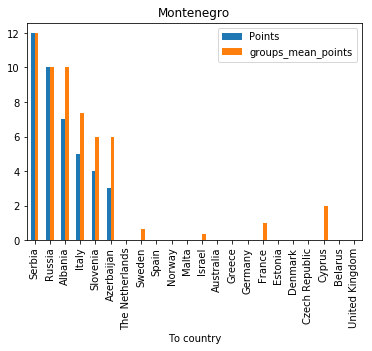

In [80]:
country_scores.sort_values('Points',ascending=False).plot(kind='bar')
plt.title('Montenegro')


In [81]:
country_data=Tele_pred_data2.loc[(Jury_pred_data2['From country']=='Serbia')]
country_scores=country_data[['To country','Points','groups_mean_points']].groupby('To country').mean()
country_scores.sort_values('Points',ascending=False).head(10)

,Points,groups_mean_points
To country,,
Slovenia,10,8.000000
Russia,8,12.000000
Italy,7,4.000000
Norway,4,1.500000
The Netherlands,3,0.000000
Spain,2,0.000000
Albania,0,0.000000
Israel,0,2.333333
Sweden,0,0.666667


Text(0.5, 1.0, 'Serbia')

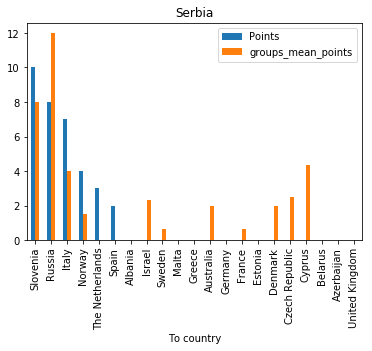

In [82]:
country_scores.sort_values('Points',ascending=False).plot(kind='bar')
plt.title('Serbia')


In [83]:
country_data=Tele_pred_data2.loc[(Jury_pred_data2['From country']=='Cyprus')]
country_scores=country_data[['To country','Points','groups_mean_points']].groupby('To country').mean()
country_scores.sort_values('Points',ascending=False).head(10)

,Points,groups_mean_points
To country,,
Greece,12,12.000000
Russia,10,10.000000
Italy,8,5.000000
The Netherlands,6,0.000000
Israel,5,3.333333
Spain,4,0.000000
France,3,3.333333
Australia,2,1.666667
Norway,0,2.500000


Text(0.5, 1.0, 'Cyprus')

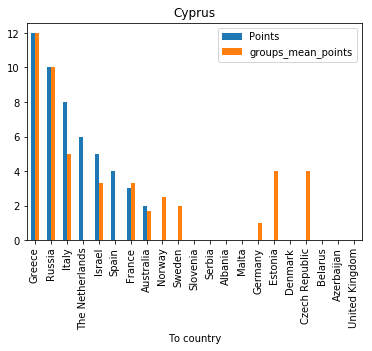

In [84]:
country_scores.sort_values('Points',ascending=False).plot(kind='bar')
plt.title('Cyprus')


Дейсвительно, видно, что зрительльское голосование особенно в сторону 2х-3х стран с наивысшими балами в некотых странах достаточно предсказуемо :)